In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
balada=pd.read_csv('balada.csv', skipinitialspace=True, index_col=0)
balada #Entre colchetes, o programa interpreta que uma COLUNA deve ser lida! 
            #Portanto, colocar o nome de uma linha não irá funcionar.
    
list(balada['RG'])

[449100.0, 109870.0, 980123.0, 451020.0, 910321.0, 371943.0, nan]

In [11]:
dados_requeridos=['RG','Tipo Ingresso']
balada[dados_requeridos] #Maneira mais concisa de se selecionar certas colunas do DF

,RG,Tipo Ingresso
Nome,,
Felipe Ventura,449100.0,Pista
Aline Moreira,109870.0,VIP
Lucas Prado,980123.0,VIP
Gerson dos Santos,451020.0,VIP
Lucas Pereira,910321.0,Pista
Olivio Kássio,371943.0,Pista
Júlia Simão,NaN,Pista


In [12]:
balada.info() #Método útil para se ter uma ideia geral sobre as informações do DF

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Felipe Ventura to Júlia Simão
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sexo                 7 non-null      object 
 1   RG                   6 non-null      float64
 2   Tipo Ingresso        7 non-null      object 
 3   Fornecedor Ingresso  7 non-null      object 
 4   Data de Aquisição    7 non-null      object 
 5   Preço                7 non-null      float64
dtypes: float64(2), object(4)
memory usage: 392.0+ bytes


In [13]:
balada=pd.read_csv(r'balada.csv', skipinitialspace=True, index_col=0) #Utilizar raw strings na leitura de DF's
bar_camarote=pd.read_csv(r'bar_camarote.csv', skipinitialspace=True, index_col=0)
#display(balada, bar_camarote)

#display(balada) # Algumas vezes, a leitura de arquivos em CSV dará erros de encoding, nesses casos, é importante
                 # utlizar o parâmetro enconding com algum argumento
balada.drop(['Sexo','RG','Fornecedor Ingresso','Data de Aquisição'], axis=1, inplace=True) #Drop retira uma determinada linha/coluna do DF 
balada.rename(columns={'Preço':'Preço Ingresso'}, inplace=True)
bar_camarote.rename(columns={'Preço':'Preço Bebida'}, inplace=True)
vip=balada.merge(bar_camarote,on='Nome').set_index('Nome') #Repare que para bar_camarote, merge considera apenas
                                          # o que está a direita de Nome

In [14]:
bar_camarote.value_counts('Produto') #Contando as bebidas mais vendidas no camarote da festa


Produto
Askov Flavours    3
Brahma            3
Skol Beats        2
dtype: int64

<BarContainer object of 3 artists>

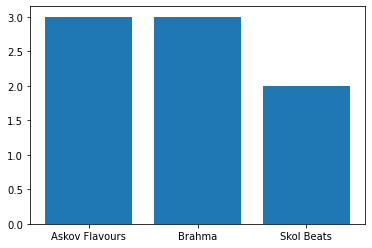

In [15]:
oi=bar_camarote.value_counts('Produto')
l1=[produto for produto in oi.index] #Maneira concisa de se agrupar elementos de um Series para a construção
l2=[quantidade for quantidade in oi.values] # de um gráfico
plt.bar(l1,l2) 
#plt.bar(oi.index,oi)

In [16]:
#o vip foi um DF criado com apenas os nomes das pessoas que compraram o ingresso VIP

vip_produtos=vip.loc[:,['Produto','Quantidade']].groupby('Produto').sum().sort_values(by='Quantidade', ascending=False)
                #O .groupby() é bastante útil para a realização de análises generalizantes
                    #No caso, estamos estudando a soma da venda de bebidas       
display(vip_produtos)
melhor_produto=vip_produtos['Quantidade'].idxmax() #Pode-se observar, há dois nomes com quantidades iguais, 
quantidade_melhor_produto=vip_produtos['Quantidade'].max()#o idxmax prioriza aquele que aparece primeiro no DataFrame
print(melhor_produto,':', quantidade_melhor_produto)
#Lembrando, métodos contrários também existem! .min(), idxmin()

,Quantidade
Produto,
Askov Flavours,6
Brahma,6
Skol Beats,5


Askov Flavours : 6


<BarContainer object of 3 artists>

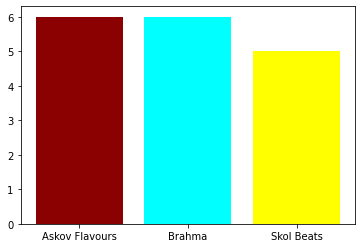

In [17]:
#Plotando os gráficos do DF criado na última célula
y=[number for number in vip_produtos['Quantidade']]
x=[number for number in range(3)]
produtos=[produto for produto in vip_produtos.index]
plt.xticks(ticks=x, labels=produtos)

plt.bar(x, y,color=['darkred','aqua','yellow'])

In [18]:
# Aplicando porcentagens e filtragens em nossos dados
display(balada)
vip_quantidade=balada['Tipo Ingresso'].value_counts().loc['VIP'] #Método verborrágico de filtragem

total_ingresso=balada['Tipo Ingresso'].value_counts().sum()
print(vip_quantidade)

print('{:.2%}'.format(vip_quantidade/total_ingresso)) #{:.2%} é o comando para format em porcentagem!

,Tipo Ingresso,Preço Ingresso
Nome,,
Felipe Ventura,Pista,59.99
Aline Moreira,VIP,89.99
Lucas Prado,VIP,89.99
Gerson dos Santos,VIP,89.99
Lucas Pereira,Pista,59.99
Olivio Kássio,Pista,59.99
Júlia Simão,Pista,59.99


3
42.86%


In [19]:
#Realizando uma filtragem 'pythonica'
vip_quantidade=balada[balada['Tipo Ingresso']=='VIP']
vip_quantidade=vip_quantidade['Tipo Ingresso'].count()#Como se trata apenas de um tipo de ingresso, pode-se usar count
total_ingresso=balada['Tipo Ingresso'].value_counts().sum()
print(type(vip_quantidade))
print('{:.2%}'.format(vip_quantidade/total_ingresso))


<class 'numpy.int64'>
42.86%


In [20]:
#Fltragens múltiplas de um DF
bebidas=pd.read_csv('bebidas.csv', skipinitialspace=True, index_col=0).sort_index()
bebidas=bebidas[(bebidas['Quantidade Devolvida']==0) & (bebidas.index=='Askov')] 
        
'Usar & com parênteses entre requisitos para filtragem múltipla'

display(bebidas)

,Quantidade Vendida,Quantidade Devolvida
Produto,,
Askov,13,0
Askov,90,0


In [21]:
# Uso isolado de groupby; sempre bastante útil para análises generalistas!
teste=pd.read_csv('bebidas.csv', skipinitialspace=True, index_col=0).sort_index()
teste.title('Análise de Produtos')
display(teste.groupby(by='Produto').sum()) 

'Sempre utilizar groupby com um método quantitativo, como sum ou mean'

AttributeError: 'DataFrame' object has no attribute 'title'

In [ ]:
#Método bastante útil da função groupby!
f1=pd.read_csv('f1.csv', skipinitialspace=True, index_col=0)
f1_class=f1.groupby(by='Equipe').sum().sort_values(by='Pontos', ascending=False)
display(f1_class)

In [ ]:
# Com o DF obtido com groupby, podemos fazer o seguinte plot:
plt.figure(1,figsize=(10,5))
teams=[team for team in f1_class.index]
points=[point for point in f1_class['Pontos']]
plt.barh( teams, points, height=0.7, color=['aqua','darkblue','darkred'])
plt.axis([0,150,-0.5,2.5])
fonte1={'font':{'weight':'bold', 'size':20, 'style':'italic'},'name':'Times New Roman', 'color':'r'}
for i,team in enumerate(teams):
    plt.text(points[i]+1,i-0.08,points[i], **fonte1)

In [6]:
#Refazendo as edições feitas no csv balada!

balada=pd.read_csv('balada.csv', skipinitialspace=True, index_col=0)

balada['Data de Aquisição']=balada['Data de Aquisição']+'/2020'

balada['Data de Aquisição']=pd.to_datetime(balada['Data de Aquisição'], format='%d/%m/%Y')

'''Aqui, colocamos a coluna de Data de Aquisição de ingressos no formato de data!
Anteriormente, ela estava como object'''

#display(balada) #Note que as datas ficaram com 1900 como ano oficial

balada['Data de Aquisição']=balada['Data de Aquisição'].replace('1900','2020')
display(balada['Data de Aquisição'])



Nome
Felipe Ventura      2020-02-24
Aline Moreira       2020-02-23
Lucas Prado         2020-02-28
Gerson dos Santos   2020-02-15
Lucas Pereira       2020-02-16
Olivio Kássio       2020-02-16
Júlia Simão         2020-02-24
Name: Data de Aquisição, dtype: datetime64[ns]

In [68]:
#Com a nova formatação de 'Data de Aquisição, vamos criar uma nova coluna em balada
balada['Dia de Aquisição']=balada['Data de Aquisição'].dt.day
display(balada)

,Sexo,RG,Tipo Ingresso,Fornecedor Ingresso,Data de Aquisição,Preço,Dia de Aquisição
Nome,,,,,,,
Felipe Ventura,Masculino,449100.0,Pista,Marcos Eventos LTDA,1900-02-24,59.99,24
Aline Moreira,Feminino,109870.0,VIP,Marcos Eventos LTDA,1900-02-23,89.99,23
Lucas Prado,Masculino,980123.0,VIP,Abreu Festas SA,1900-02-28,89.99,28
Gerson dos Santos,Masculino,451020.0,VIP,Marcos Eventos LTDA,1900-02-15,89.99,15
Lucas Pereira,Masculino,910321.0,Pista,Marcos Eventos LTDA,1900-02-16,59.99,16
Olivio Kássio,Masculino,371943.0,Pista,Marcos Eventos LTDA,1900-02-16,59.99,16
Júlia Simão,Feminino,NaN,Pista,Abreu Festas SA,1900-02-24,59.99,24


In [71]:
#Agora, vamos substituir um valor no DF sem utilizar o replace

'Para isso, vamos utilizar o caso do RG da Júlia Simão'

balada.loc['Júlia Simão','RG']=123456
display(balada)

,Sexo,RG,Tipo Ingresso,Fornecedor Ingresso,Data de Aquisição,Preço,Dia de Aquisição
Nome,,,,,,,
Felipe Ventura,Masculino,449100.0,Pista,Marcos Eventos LTDA,1900-02-24,59.99,24
Aline Moreira,Feminino,109870.0,VIP,Marcos Eventos LTDA,1900-02-23,89.99,23
Lucas Prado,Masculino,980123.0,VIP,Abreu Festas SA,1900-02-28,89.99,28
Gerson dos Santos,Masculino,451020.0,VIP,Marcos Eventos LTDA,1900-02-15,89.99,15
Lucas Pereira,Masculino,910321.0,Pista,Marcos Eventos LTDA,1900-02-16,59.99,16
Olivio Kássio,Masculino,371943.0,Pista,Marcos Eventos LTDA,1900-02-16,59.99,16
Júlia Simão,Feminino,123456.0,Pista,Abreu Festas SA,1900-02-24,59.99,24


In [89]:
#Transformando balada em um arquivo em csv
balada.to_csv('/Users/felipeveiga/Documents/Jupyter/Python Lira/balada_aula.csv', sep=';', encoding='latin1')

'''Para solucionar os problemas com acentuação no Excel, utilizar o comando de encoding com latin1'''

'Para solucionar os problemas com acentuação no Excel, utilizar o comando de encoding com latin1'

In [90]:
#Transformação de um dicionário em DataFrame
casas_bahia={'iphone':[500,750],'samsung a-30':[300,400], 'zenfone':[150,180]}
casas_bahia_df=pd.DataFrame.from_dict(casas_bahia, orient='index') 

'O comando orient indica qual função as chaves do dicionário deverão ter (index ou colunas)'

casas_bahia_df.rename(columns={0:2019,1:2020}, inplace=True)
casas_bahia_df.name='Preço dos Produtos'

display(casas_bahia_df)

,2019,2020
iphone,500,750
samsung a-30,300,400
zenfone,150,180


In [102]:
#Lendo arquivos em csv da internet
import requests
import io

conteudo=requests.get('https://drive.google.com/file/d/1s8UUGpwI95wQJ4TEWx7qFlChfTrxmkS4/view?usp=sharing')
conteudo=conteudo.content
arquivo=io.StringIO(conteudo.decode('latin1'))
#display(arquivo)
#pd.read_csv('https://drive.google.com/file/d/1s8UUGpwI95wQJ4TEWx7qFlChfTrxmkS4/view?usp=sharing', index_col=0, encoding='utf-8')
pd.read_csv(arquivo)



ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [7]:
pd.read_csv('mercado.csv')

,Produto,Preço
0,Arroz,2
1,Feijão,4
2,Abóbora,5


In [66]:
# Lendo uma tabela em Excel
# Atualizando valores de linhas com base em informações de outras linhas

tabela=pd.read_excel('Excel_Exemplo_Lira.xlsx', header=1, index_col=2)
tabela.drop(tabela.iloc[:,[0,1]], axis=1, inplace=True) 


'Método rápido de se deletar colunas/linhas do DF: drop'


tabela.rename(columns={'Multiplicador Impoto':'Multiplicador Imposto'},inplace=True) #Pequena Correção do DF
tabela.loc[tabela['Tipo']=='Celular','Multiplicador Imposto']=1.5


'Estamos trocando o valor do multiplicador de imposto apenas para os produtos do tipo Celular'

display(tabela)

,Preço,Tipo,Multiplicador Imposto,Quantidade 1° Semestre,Receita 1° Semestre,Quantidade 2° Semestre,Receita 2° Semestre
Produto,,,,,,,
Iphone 11,3100,Celular,1.5,23,85560,12,44640
Samsung A-30,1200,Celular,1.5,42,60480,31,44640
XBOX One,1900,Console,1.3,11,27170,21,51870
PS4,2100,Console,1.3,9,24570,19,51870


In [67]:
#Atualizando os valores de Receitas

'''Como sabemos, o pandas não importa as fórmulas utilizadas na planilha. Dessa forma, 
deveremos atualizar, também os valores de Receita do 1° e 2° Semestres'''

tabela['Receita 1° Semestre']=tabela['Preço']*tabela['Multiplicador Imposto']*tabela['Quantidade 1° Semestre']
tabela['Receita 2° Semestre']=tabela['Preço']*tabela['Multiplicador Imposto']*tabela['Quantidade 2° Semestre']

tabela=tabela.iloc[:,[1,0,2,3,4,5,6]] #Novamente: uma outra pequena correção no DF

display(tabela)


,Tipo,Preço,Multiplicador Imposto,Quantidade 1° Semestre,Receita 1° Semestre,Quantidade 2° Semestre,Receita 2° Semestre
Produto,,,,,,,
Iphone 11,Celular,3100,1.5,23,106950.0,12,55800.0
Samsung A-30,Celular,1200,1.5,42,75600.0,31,55800.0
XBOX One,Console,1900,1.3,11,27170.0,21,51870.0
PS4,Console,2100,1.3,9,24570.0,19,51870.0


In [71]:
# Salvando o DF produzido como um arquivo em Excel

tabela.to_excel('Nova_Tabela_Lira.xlsx') # Lembrar de colocar a extensão do arquivo!


'Abrindo o arquivo, é visível notar que o gráfico da planilha original não está mais disponível'

'Abrindo o arquivo, é visível notar que o gráfico da planilha original não está mais disponível'

In [89]:
# Agora, faremos o mesmo procedimento com o openpyxl
from openpyxl import Workbook, load_workbook

planilha= load_workbook('Excel_Exemplo_Lira.xlsx')  #Carregando o arquivo
pagina_ativa=planilha.active                       #Selecionando a worksheet ativa 


print(pagina_ativa['C5'].value) 
print(pagina_ativa['C5'].column)

'Aqui, estamos pedindo para que o openpyxl printe o valor da célula C5'
'Também pedimos para o openpyxl nos revelar o valor da coluna da célula escolhida'

XBOX One
3


'Aqui, estamos pedindo para que o openpyxl printe o valor da célula C5'

In [19]:
# Vamos continuar nossas atividades no openpyxl
# Iremos fazer a mesma substituição do Multiplicador Imposto realizado no pandas

planilha=load_workbook('Excel_Exemplo_Lira.xlsx')
pagina_ativa=planilha.active
for celula in pagina_ativa['E']: #Lembrando: a coluna E é aquela que contém os tipos dos produtos
    if celula.value=='Celular':
        numero_linha=celula.row
        pagina_ativa[f'F{numero_linha}']=1.5 #Aqui, fazemos algo como uma formatação in place do valor da célula!
        
        
planilha.save('openpyxl_teste_Lira.xlsx')

'''Quando você for abrir o arquivo, repare que tanto as fórmulas das outras colunas, quanto o gráfico
plotado serão preservados!'''


'Quando você for abrir o arquivo, repare que tanto as fórmulas das outras colunas, quanto o gráfico\nplotado serão preservados!'

### 'Agora, vamos complementar o módulo do lira com um vídeo sobre o openpyxl do Tech With Tim' ###

In [120]:
# Como um verificador de nossas alterações no workbook, utilizaremos esta view do arquivo com o pandas 

import pandas as pd
import numpy as np
a=pd.read_excel('Excel_Exemplo_Lira.xlsx')

l=['0','A','B','C','D','E','F','G','H','I','J']

d1={f'Unnamed: {i}':letter for i, letter in enumerate(l)}
d2={x:y for x,y in zip(np.arange(0,5), np.arange(2,7))}

a.rename(columns=d1, index=d2, inplace=True)
a.drop(a.iloc[:,[0,1]], axis=1,inplace=True)
display(a)

'''Fizemos um pequeno tratamento no DataFrame: note que, agora, os nomes das colunas e index são
equivalentes aos daqueles do arquivo em Excel.

    Dessa forma, a localização das células se tornará mais simples'''

,B,C,D,E,F,G,H,I
2,Produto,Preço,Tipo,Multiplicador Impoto,Quantidade 1° Semestre,Receita 1° Semestre,Quantidade 2° Semestre,Receita 2° Semestre
3,Iphone 12,3100,Celular,1.2,23,85560,12,44640
4,Samsung A-30,1200,Celular,1.2,42,60480,31,44640
5,XBOX One,1900,Console,1.3,11,27170,21,51870
6,PS4,2100,Console,1.3,9,24570,19,51870


'Fizemos um pequeno tratamento no DataFrame: note que, agora, os nomes das colunas e index são\nequivalentes aos daqueles do arquivo em Excel.\n\n    Dessa forma, a localização das células se tornará mais simples'

In [104]:
from openpyxl import Workbook, load_workbook

wb = load_workbook('Excel_Exemplo_Lira.xlsx')
ws = wb.active #Abrindo a worksheet ativa do nosso Workbook

print(ws['C3'].value) #Printando o valor de uma determinada célula em nossa worksheet

'''Lembre-se sempre de utilizar .value para essas operações!'''


None


'Lembre-se sempre de utilizar .value para essas operações!'

In [89]:
#Agora, vamos alterar o valor de uma determinada célula

ws['C3']='Iphone 12'  #Nota: para a alteração de valores, não precisamos do comando .value
wb.save('Excel_Exemplo_Lira.xlsx')

'Como visto em nossa view, a célula C3 agora não é mais Iphone 11, e sim, Iphone 12'

'Como visto em nossa view, a célula C3 agora não é mais Iphone 11, e sim, Iphone 12'

In [99]:
# Vamos aprender a buscar uma worksheet que não seja a active

print(wb.sheetnames)  # Printando os nomes das worksheets de nosso arquivo


'Tendo isso em vista, caso quiséssemos trabalhar com a worksheet Teste Sheet, deveríamos realizar:'

wb=load_workbook('Excel_Exemplo_Lira.xlsx')
ws = wb['Teste Sheet']
print(ws)

['Mercado', 'Teste Sheet']
<Worksheet "Teste Sheet">


In [102]:
# Agora, vamos criar uma nova worksheet em nosso arquivo

wb.create_sheet('OpenPyXL')
'Realizar este comando apenas uma vez: caso o contrário, o python criará novas worksheets (teste, teste1, teste2, etc)'

print(wb.sheetnames)

['Mercado', 'Teste Sheet', 'OpenPyXL', 'OpenPyXL1', 'OpenPyXL2']


In [118]:
# Agora, vamos criar o nosso próprio workbook!

wb= Workbook()
ws= wb.active
ws.title='Notas Escola'

'Para adicionar de maneira rápida valores, podemos utlizar o comando append'

ws.append(['Matéria','1° Tri','2° Tri','3° Tri','Soma Notas'])
ws.append(['Matemática', 7.5, 8, 4.5, '=SUM(B2,C2,D2)'])
ws.append(['Português',4,6,9.5,'=AVERAGE(B3:D3)'])

wb.save('primeiro_openpyxl.xlsx')

#Parei no instante 13:10!

In [25]:
from openpyxl import Workbook, load_workbook

wb=Workbook()
ws=wb.active
ws.title='Dados Balada'

balada=pd.read_csv('balada.csv',skipinitialspace=True, header=None)
for i in range(len(balada)):
    a=[dados for dados in balada.iloc[i,:]]
    ws.append(a)


wb.save('Balada_Teste.xlsx')


In [26]:
wb.create_sheet('Camarote')

<Worksheet "Camarote">

In [30]:
ws=wb['Camarote']

bar=pd.read_csv('bar_camarote.csv', header=None)

for i in range(len(bar)):
    a=[dados for dados in bar.iloc[i,:]]
    ws.append(a)
    
wb.save('Balada_Teste.xlsx')

In [37]:
# Acessando valores individuais de células
from openpyxl import Workbook, load_workbook
from openpyxl.utils import get_column_letter

wb=Workbook()
ws=wb.active
ws.title='Nomeando células'

# Para o loop, utilizaremos get_column_name, que transforma uma integer em um nome de coluna Excel
for row in range(1,5):
    for column in range(1,5):
        column=get_column_letter(column)
        ws[column + str(row)] = column + str(row)
        
wb.save('Nomes_Celulas.xlsx')

In [38]:
# Podemos utilizar o openpyxl para fundir células
# PS: Para essa tarefa, vamos reutilizar o arquivo da questão anterior criando uma nova sheet
wb = load_workbook('Nomes_Celulas.xlsx')
wb.create_sheet('Merge Cells')

<Worksheet "Merge Cells">

In [41]:
ws=wb['Merge Cells']
ws.merge_cells('A1:E1')
ws['A1']='Estas células sofreram um merge'

# Se você quiser reverter o merge, escreva ws.unmerge_cells('A1:E1')
wb.save('Nomes_Celulas.xlsx')

In [ ]:
# Podemos, também, fazer o insert de novas linhas e colunas
wb = load_workbook('Balada_Teste.xlsx')
ws = wb['Dados Balada']

ws.insert_rows(7)

#PS: O comando para a inserção de novas colunas é ws.insert_cols(Numeração da Coluna) -> A=1; B=2, etc

In [45]:
# Com a linha inserida, vamos preenchê-la com novos dados

l = ['Gilberto Carvalho', 'Masculino', 131312, 'Pista', 'Marcos LTDA', '31/03', 59.99]
for column_number in range(1,8):
    column_letter = get_column_letter(column_number)
    ws[column_letter + str(7)] = l[column_number - 1]
    

wb.save('Balada_Teste.xlsx')

In [48]:
# Deletando uma linha/coluna criada
# Obs: Ainda utilizaremos o arquivo da Balada!

ws.delete_rows(3)

wb.save('Balada_Teste.xlsx')


In [51]:
# Podemos mover um conjunto de dados de um lugar da planilha para outro
# Obs: Ainda estamos utilizando o arquivo da Balada

ws = wb['Dados Balada']
ws.move_range('A1:G6', rows=5, cols=5)

wb.save('Balada_Teste.xlsx')

In [58]:
# Vamos criar um novo workbook inserir agora uma série de dados

wb = Workbook()
ws = wb.active
ws.title = 'Notas'

dados = {'Felipe' : {'Matemática' : 6.5, 'Português' : 7, 'História':8}, 
        'Guilherme' : {'Matemática' : 9, 'Português' : 8.5, 'História' : 6.5},
        'Eduardo' : {'Matemática' : 3, 'Português' : 1.5, 'História' : 10}
        } 

# Primeiramente, vamos criar um header para o arquivo
header = ['Nome'] + list(dados['Felipe'].keys())
ws.append(header)

wb.save('Boletim.xlsx')


In [61]:
# Agora, vamos inserir os nomes dos alunos e suas respectivas notas

# Como os dicionários não possuem index, devemos utilizar um loop para acessar os seus dados
for person in dados:
    grades = list(dados[person].values())
    ws.append([person] + grades )
    
wb.save('Boletim.xlsx')

In [65]:
# Criando mais um elemento no header
ws['E1'] = 'Média'
wb.save('Boletim.xlsx')

In [64]:
# Vamos inserir a média geral das notas disponíveis
        
for row in range (2,5):
    ws[f'E{row}'] = f'=AVERAGE(B{row}:D{row})'

wb.save('Boletim.xlsx')
    

In [68]:
# Aqui, fiz apenas uma correção dos dados
for i in range(2):
    ws.delete_rows(5)

wb.save('Boletim.xlsx')

In [9]:
# Dia 11/09/2021: Parei no instante 30:15
from openpyxl import Workbook, load_workbook
wb = load_workbook('Boletim.xlsx')
wb.create_sheet('Grades USA')

<Worksheet "Grades USA">

In [11]:
ws = wb['Grades USA']

d={'Jefferson':{'Math':'A+','Literature':'C','Chemistry':'B-'},
  'Arnaldo':{'Math':'D+','Literature':'C-','Chemistry':'A+'},
  'Oliver':{'Math':'C+','Literature':'F','Chemistry':'A-'}
  }

l = ['Name'] + list(d['Jefferson'].keys())
ws.append(l)

wb.save('Boletim.xlsx')

In [12]:
ws.delete_rows(2)

In [13]:
wb.save('Boletim.xlsx')

In [14]:
for person in d:
    ws.append([person]+[grade for grade in d[person].values()])

In [16]:
wb.save('Boletim.xlsx')

In [23]:
from openpyxl.utils import get_column_letter
from openpyxl.styles import Font

for column_number in range(1,len(d['Jefferson'].values()) + 2):
    column_letter = get_column_letter(column_number)
    ws[f'{column_letter}{1}'].font = Font(name='Times New Roman',bold=True, italic=True )
    
wb.save('Boletim.xlsx')

# Agora, estamos voltando aos vídeos do Lira!

In [41]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
bookstore = pd.read_csv('bookstore.csv', index_col=0, skipinitialspace=True)
bookstore.loc[bookstore.index == 'Machiavelli: Genious or the Demonic Confusion?', 'Quantity'] +=23

bookstore

,Author,Quantity
Book,,
Edgar Allan Poe Short,E.A Poe,7
The Adventures of Sherlock Holmes,Sir Arthur Conan Doyle,1
Machiavelli: Genious or the Demonic Confusion?,Olavo de Carvalho,24
Le Crime au Père Boniface,Guy de Maupassant,3


In [ ]:
from tqdm import tqdm

pbar = tqdm(total=len(np.arange(100)), position=0, leave=True)
for i in range(1000000000000000000):
    pbar.update()
    print(i)